# Glass Classification

**In this book Iam going to post all the trail and the errors done before reaching the final model**

The order by which we will go:
1.Exploratory Data Analysis 
2.Cleaning the data 
3.Feature Engineering 
4.Trying various models.
5.Final selecting the model with the best accuracy  

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import  randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:\\Users\\kishu\\Desktop\\PandasDemo\\Data\\glass.csv')
print(df)
print("\n")
print(df.shape)
print("\n")
print(df.describe())
print("\n")
#checking for the composition
print(df.info())


          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe       Type
0    1.51872  12.93  3.66  1.56  72.51  0.58  8.55  0.00  0.12       BWNF
1    1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00  Headlamps
2    1.51905  13.60  3.62  1.11  72.64  0.14  8.76  0.00  0.00        BWF
3    1.51811  12.96  2.96  1.43  72.92  0.60  8.79  0.14  0.00       BWNF
4    1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00  Headlamps
..       ...    ...   ...   ...    ...   ...   ...   ...   ...        ...
209  1.51670  13.24  3.57  1.38  72.70  0.56  8.44  0.00  0.10        VWF
210  1.51732  14.95  0.00  1.80  72.99  0.00  8.61  1.55  0.00  Headlamps
211  1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.00  0.00        BWF
212  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11        BWF
213  1.51709  13.00  3.47  1.79  72.72  0.66  8.18  0.00  0.00       BWNF

[214 rows x 10 columns]


(214, 10)


               RI          Na          Mg          Al          Si        

# Exploratory data analysis

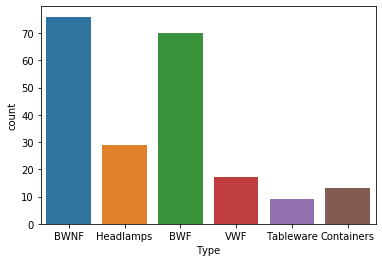

In [3]:

sns.countplot(x='Type',data=df)
plt.show()

**From the graph it is evident that maximum we have BWNF ,next BWF glass: we have a bit of biasing since two clasese are high in number**

This is a unbalaced dataset since the tableware and containers dont have sufficent represention ,leading to the imbalance


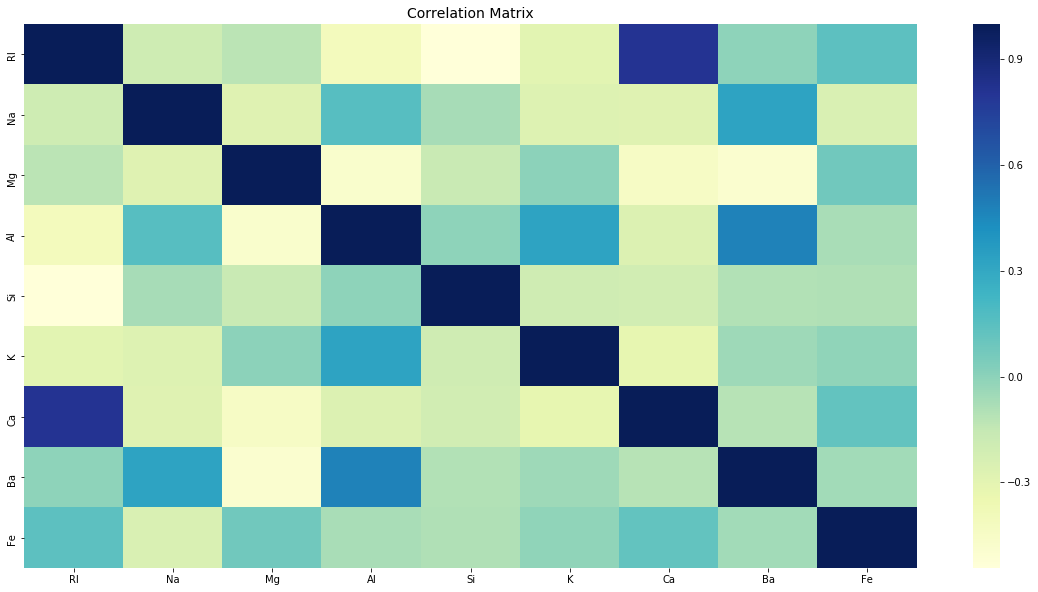

In [4]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

**From the graph it is evident that the propertie are co-related , with each other and vary linerly**

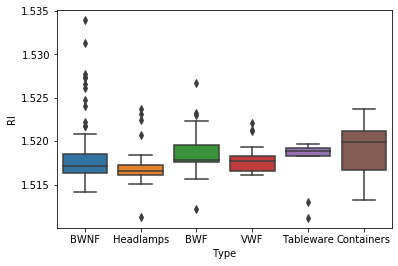

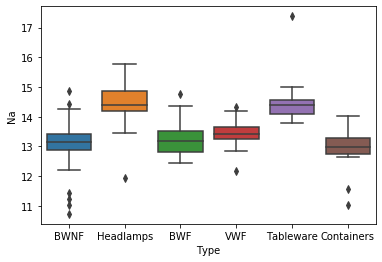

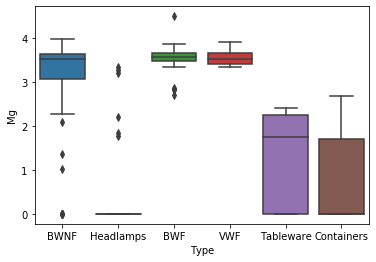

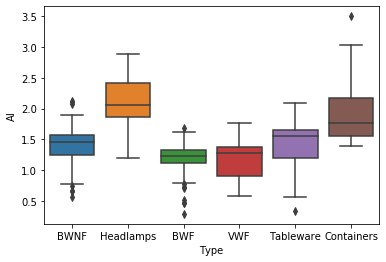

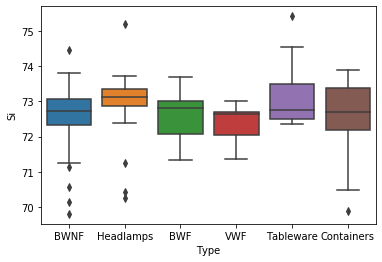

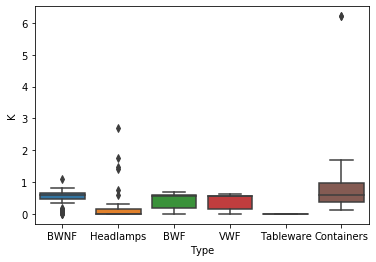

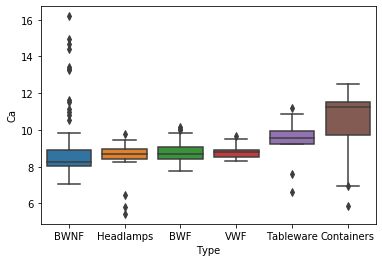

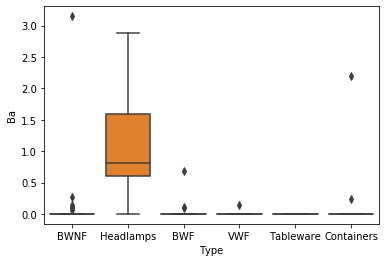

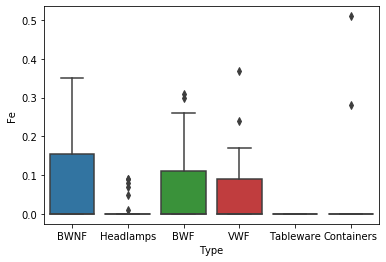

In [5]:
# to know about the outliers

features = df.columns[:-1]

for feature in features:
    sns.boxplot(x='Type',y=feature,data=df)
    plt.show()

**There are lot of outliers ,in each of the column :BWNF type has lots of outliers**

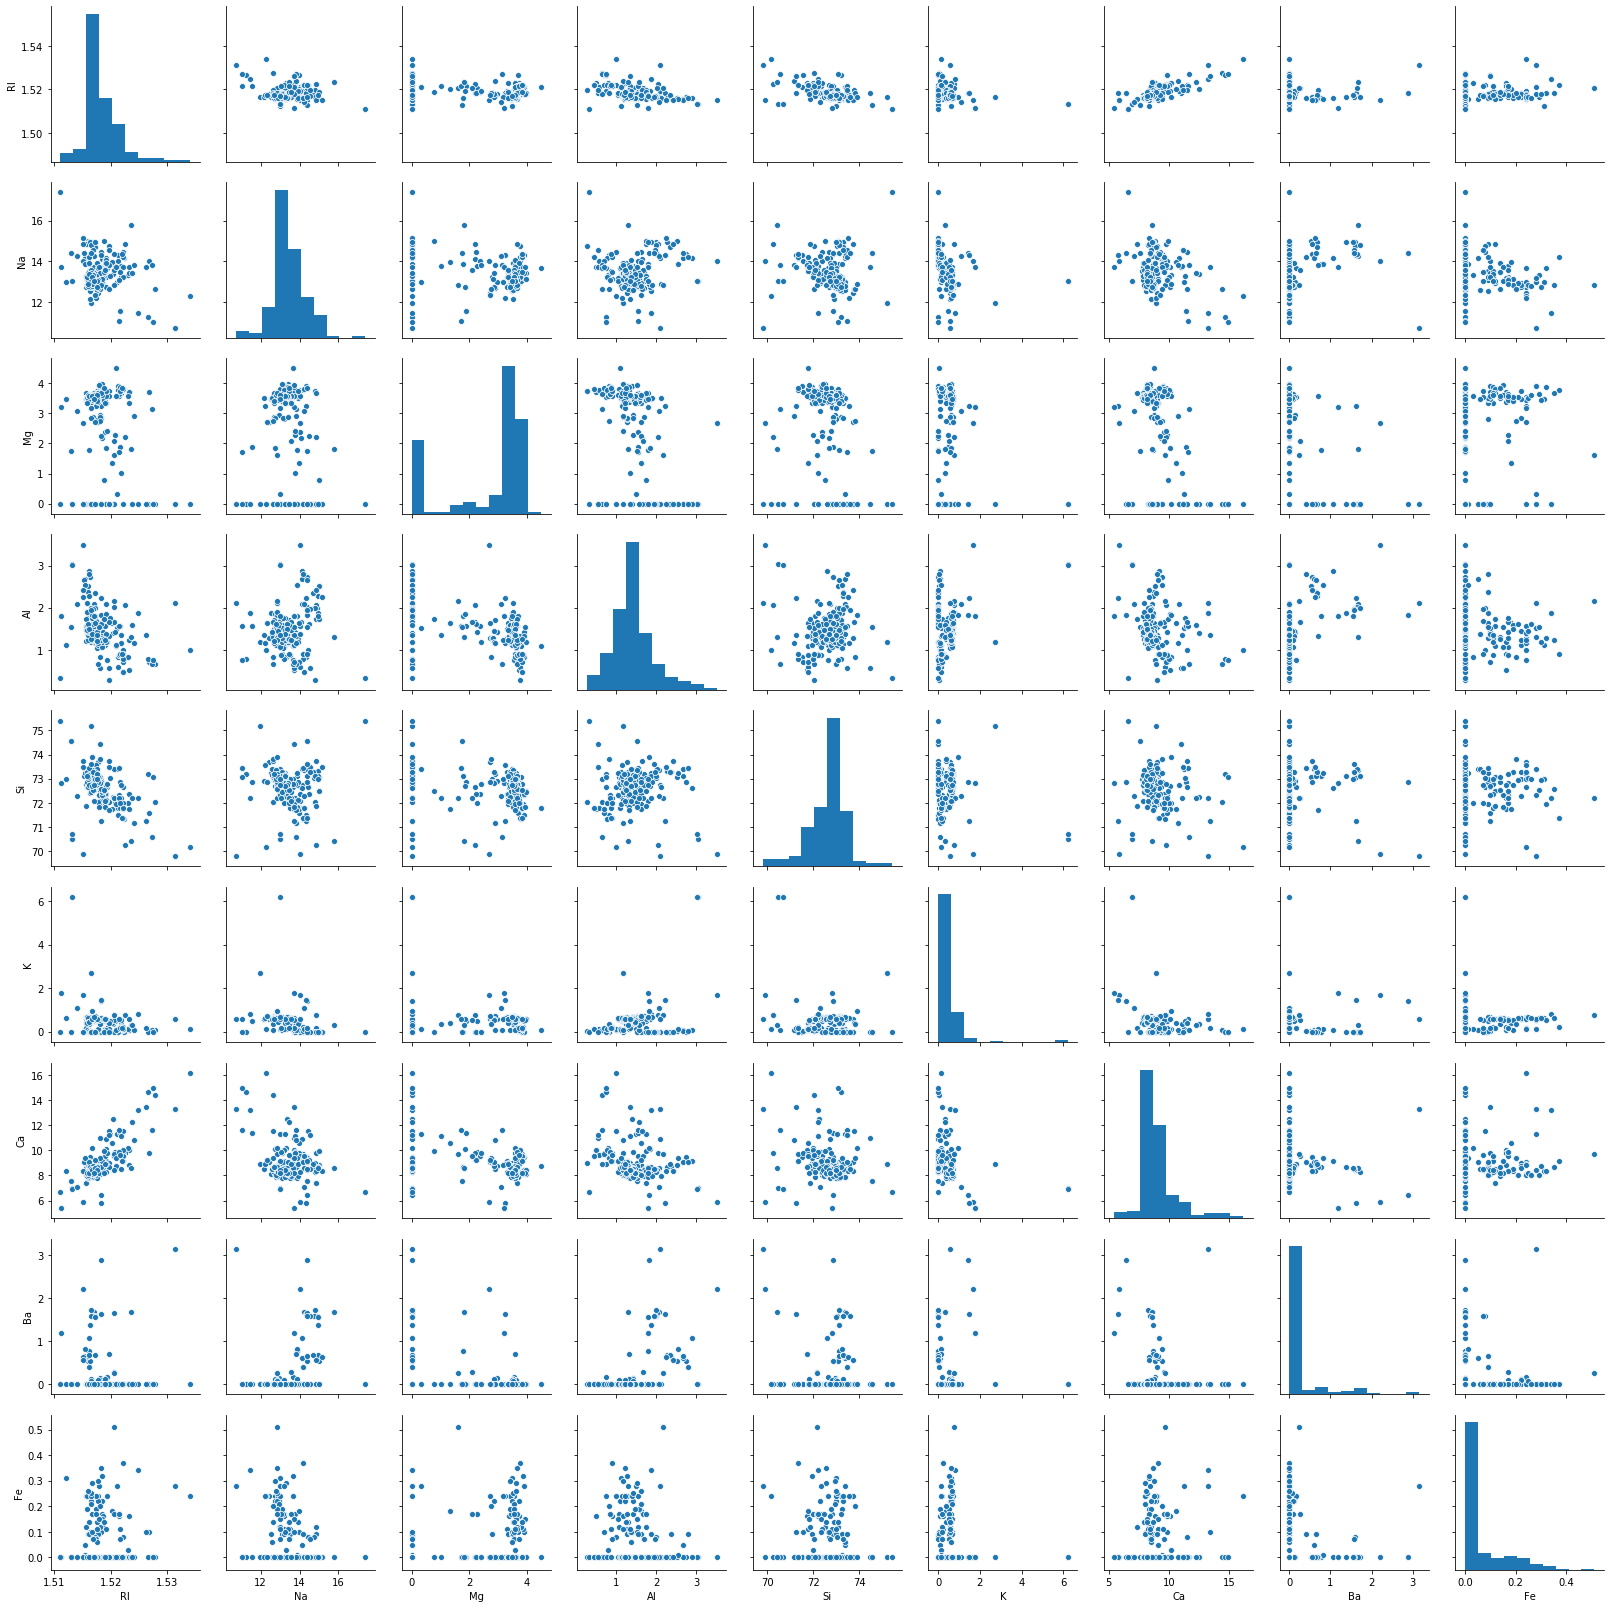

In [6]:
sns.pairplot(df)
plt.show()

**From the above pair plot it is visible that the features are skewed, and mostly around the same range 
The refractive index is almost contant**

# Data Cleaning

In [7]:
# duplicate
print(df[df.duplicated()== True])

# we have got one duplicate
df.drop_duplicates(inplace=True)
# checking if the duplicate is removed
print(df[df.duplicated()== True])

          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe Type
189  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0  BWF
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []


In [8]:
print(df.isnull().sum())


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


**From the above it is clear that there are no nulll values**


In [9]:
#checking for the Nan Values
print(df.isna().sum())


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


**There are no nan values**

# Feature Engineering

In [10]:
# labeling the results
unique =(df['Type'].unique())
print((unique))

print("\n")
label = preprocessing.LabelEncoder()
labelled = label.fit_transform(unique)

print(label.transform(df['Type']))

type = label.transform(df['Type'])

# adding the column to the dataset
df['type'] = type

print(df)

['BWNF' 'Headlamps' 'BWF' 'VWF' 'Tableware' 'Containers']


[1 3 0 1 3 1 0 5 5 0 0 0 1 0 0 0 3 3 1 3 0 1 0 0 0 5 3 4 1 1 2 2 0 0 0 3 2
 3 5 1 2 1 2 5 0 1 0 1 3 1 5 2 1 0 0 0 0 1 1 5 4 1 0 0 0 0 1 0 0 3 4 0 1 1
 1 4 0 0 1 3 3 1 1 1 1 1 3 1 0 1 1 5 3 2 0 1 5 3 0 0 1 1 3 0 0 0 3 1 0 1 1
 5 0 1 3 2 3 1 1 2 1 1 0 0 2 5 5 1 4 1 0 0 1 0 1 4 0 1 1 1 4 0 5 2 1 0 0 3
 1 1 0 1 0 5 1 1 0 1 0 0 0 0 3 0 0 0 0 3 1 3 1 1 5 1 0 1 3 5 1 1 1 0 0 1 1
 0 3 1 4 4 3 3 2 1 2 1 1 0 1 1 0 1 3 0 1 1 1 0 5 3 0 0 1]
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe       Type  \
0    1.51872  12.93  3.66  1.56  72.51  0.58  8.55  0.00  0.12       BWNF   
1    1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00  Headlamps   
2    1.51905  13.60  3.62  1.11  72.64  0.14  8.76  0.00  0.00        BWF   
3    1.51811  12.96  2.96  1.43  72.92  0.60  8.79  0.14  0.00       BWNF   
4    1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00  Headlamps   
..       ...    ...   ...   ...    ...   ... 

In [11]:
# dropping the original columns
df.drop(columns=["Type"],inplace=True)


In [15]:
# since we have an imbalanced datatype we are going for the updsampling and downsampling
num_0 = len(df[df['type']==0])
num_1 = len(df[df['type']==1])
num_2 = len(df[df['type']==2])
num_3 = len(df[df['type']==3])
num_4 = len(df[df['type']==4])
num_5 = len(df[df['type']==5])

print(num_0,num_1,num_2,num_3,num_4,num_5)

69 76 13 29 9 17


In [58]:
df_1 = pd.concat([df[df['type']==2] ,df[ df['type']==3],df[ df['type']==4],df[ df['type']==5]],ignore_index=True)
# print(df_1)

# print(num_0,num_1)# random
undersampled_data = pd.concat([df[df['type']==0].sample(num_3) ,df[df['type']==1].sample(num_3),df_1])
print((undersampled_data))# random


print("\n")
oversampled_data = pd.concat([ df[df['type']==0] ,df[df['type']==1],df[df['type']==2].sample(54,replace=True) ,
                               df[df['type']==3].sample(54,replace=True),df[ df['type']==4].sample(54,replace=True),df[df['type']==5].sample(54,replace=True)],ignore_index=True)
print((oversampled_data))


          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  type
62   1.52152  13.05  3.65  0.87  72.32  0.19  9.85  0.0  0.17     0
105  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     0
156  1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.0  0.00     0
146  1.51837  13.14  2.84  1.28  72.85  0.55  9.07  0.0  0.00     0
201  1.52172  13.48  3.74  0.90  72.01  0.18  9.61  0.0  0.07     0
..       ...    ...   ...   ...    ...   ...   ...  ...   ...   ...
63   1.51769  13.65  3.66  1.11  72.77  0.11  8.60  0.0  0.00     5
64   1.51610  13.42  3.40  1.22  72.69  0.59  8.32  0.0  0.00     5
65   1.51610  13.33  3.53  1.34  72.67  0.56  8.33  0.0  0.00     5
66   1.51694  12.86  3.58  1.31  72.61  0.61  8.79  0.0  0.00     5
67   1.51670  13.24  3.57  1.38  72.70  0.56  8.44  0.0  0.10     5

[126 rows x 10 columns]


          RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  type
0    1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.0  0.00     0
1    1.51736  12.78

In [59]:
#separating the dependent and indepenedent variable
X = (oversampled_data.iloc[:,:-1])
Y = oversampled_data.iloc[:,-1]

In [60]:
#Spliting the data into train and test sets
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,random_state=101,test_size=0.3)
print(X_train,Y_train)

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
213  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
306  1.51888  14.99  0.78  1.74  72.50  0.00   9.95  0.00  0.00
135  1.51800  13.71  3.93  1.54  71.81  0.54   8.21  0.00  0.15
303  1.51969  14.56  0.00  0.56  73.48  0.00  11.22  0.00  0.00
227  1.52247  14.86  2.20  2.06  70.26  0.76   9.76  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
63   1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26
326  1.51694  12.86  3.58  1.31  72.61  0.61   8.79  0.00  0.00
337  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00
11   1.51215  12.99  3.47  1.12  72.98  0.62   8.35  0.00  0.31
351  1.51776  13.53  3.41  1.52  72.04  0.58   8.79  0.00  0.00

[252 rows x 9 columns] 213    3
306    4
135    1
303    4
227    3
      ..
63     0
326    5
337    5
11     0
351    5
Name: type, Length: 252, dtype: int32


# Feature Scaling

In [61]:
SS = StandardScaler()
X_train =SS.fit_transform(X_train)
X_test = SS.transform(X_test)


# Trying the various algorithms for the maximum accurate model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #first we take only one ,later it will be chnaged
knn.fit(X_train,Y_train)
y_predict = knn.predict(X_test)

score = knn.score(X_test,Y_test)
print(score*100)

89.90825688073394


**This has given us an accuracy of 89.90%**

In [63]:
print(confusion_matrix(Y_test,y_predict))
print("\n")
print(classification_report(Y_test,y_predict))

[[15  3  0  0  0  1]
 [ 2 14  1  0  0  2]
 [ 0  0 18  0  0  0]
 [ 0  0  2 20  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 16]]


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.82      0.74      0.78        19
           2       0.86      1.00      0.92        18
           3       1.00      0.91      0.95        22
           4       1.00      1.00      1.00        15
           5       0.84      1.00      0.91        16

    accuracy                           0.90       109
   macro avg       0.90      0.91      0.90       109
weighted avg       0.90      0.90      0.90       109



In [64]:
from sklearn.svm import  SVC

# predicting with the default values
svm_regressor = SVC(random_state= 0)
svm_regressor.fit(X_train,Y_train)

y_pred =svm_regressor.predict(X_test)

cm = confusion_matrix(Y_test,y_pred)
print(cm)


print("\n")

As = accuracy_score(Y_test,y_pred)
print(As)

[[17  2  0  0  0  0]
 [ 5 12  1  0  1  0]
 [ 0  0 18  0  0  0]
 [ 0  2  0 20  0  0]
 [ 0  0  0  0 15  0]
 [ 6  1  0  0  0  9]]


0.8348623853211009


**This has given us an accuracy of 83.48%**

In [65]:
from sklearn.tree import DecisionTreeClassifier

# trying with the default vaoues
dt_regressor = DecisionTreeClassifier(max_depth=5)
dt_regressor.fit(X_train,Y_train)

y_pred = dt_regressor.predict(X_test)



acc_score = accuracy_score(Y_test,y_pred)
print(acc_score)

print("\n")

cm = confusion_matrix(Y_test,y_pred)
print(cm)

0.7889908256880734


[[13  2  1  0  0  3]
 [ 6 10  1  1  1  0]
 [ 0  0 18  0  0  0]
 [ 0  0  2 20  0  0]
 [ 0  0  0  0 15  0]
 [ 4  2  0  0  0 10]]


**This has given us an accuracy of 78.9%**

In [67]:
from xgboost import  XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)


score= accuracy_score(Y_test,y_pred)
print(score)

print(classification_report(Y_test,y_pred))

0.926605504587156
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.94      0.79      0.86        19
           2       0.78      1.00      0.88        18
           3       1.00      0.91      0.95        22
           4       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16

    accuracy                           0.93       109
   macro avg       0.93      0.93      0.93       109
weighted avg       0.93      0.93      0.93       109



**This has given us an accuracy of 92.6% . This is the best model so far**

# Stacking to improve the result

In [68]:
from mlxtend.classifier import  StackingCVClassifier
from sklearn.svm import  SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score

xgb = XGBClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

stack = StackingCVClassifier(classifiers=(xgb,rf,knn,svc),
                             meta_classifier=xgb,cv=10,
                             use_features_in_secondary=True,
                             store_train_meta_features=True,
                             shuffle=False,
                             random_state=54)

stack.fit(X_train,Y_train)
y_pred = stack.predict(X_test)


print(accuracy_score(Y_test,y_pred))

cm = confusion_matrix(Y_test,y_pred)
print(cm)

print(classification_report(Y_test,y_pred))

0.9357798165137615
[[17  2  0  0  0  0]
 [ 2 16  0  0  1  0]
 [ 0  0 18  0  0  0]
 [ 0  2  0 20  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.80      0.84      0.82        19
           2       1.00      1.00      1.00        18
           3       1.00      0.91      0.95        22
           4       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16

    accuracy                           0.94       109
   macro avg       0.94      0.94      0.94       109
weighted avg       0.94      0.94      0.94       109



**This has given us an accuracy of 93.57% . This is the best model so far**

# Since the stacking model is giving us the best result we are going to select the stacked model.

# Note :
**We did not go for hyper parameter testing here to improve the efficiency but in the deployed model we have even done that.
So if anybody interested in knowing the hyper-parameter tuning can Ping me for the copy since is in private git file**